# Demonstrate changes in SR with learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tesser import sr
from tesser import tasks
from tesser import util

## Load structure learning data for one subject

In [2]:
data_dir = '/Users/morton/Dropbox/data/tesser'
struct = util.load_struct_df_all(data_dir, 101)
envstep = struct.objnum.to_numpy() - 1

Calculate the SR on each trial, based on learning during the task.

Currently, learning about transitions even when it's between runs. Between parts, this is a gap of about 15-20 minutes. More realistic would be to make it so the SR isn't updated on those trials.

In [3]:
n_state = 21
M = np.zeros((n_state, n_state))
sr_reps = sr.neural_sr(envstep, .9, .1, M, n_state)

Visualize changes in object SR over learning.

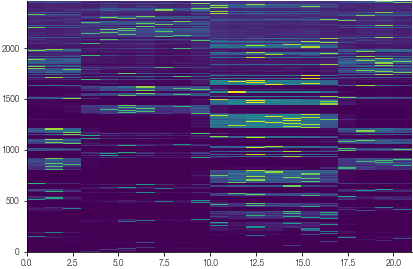

In [4]:
plt.pcolor(sr_reps)

Plot just the predictions for part 2 during scanning

In [6]:
sr_reps_part2 = sr_reps[struct['part'] == 2]
sr_reps_part2.shape

(882, 21)

In [7]:
struct.loc[struct['part'] == 2].iloc[0]

SubjNum               101
run                     1
trial                   3
objnum                 12
file         object_2.jpg
orientnam             cor
orientnum               1
resp                  NaN
respnum                 0
acc                     0
rt                    NaN
part                    2
seqtype                 1
Name: 2, dtype: object

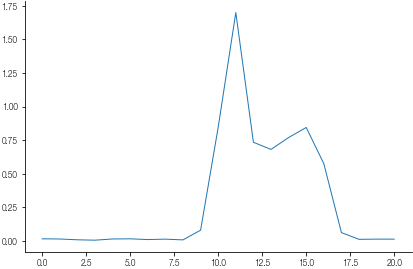

In [8]:
plt.plot(sr_reps_part2[0])

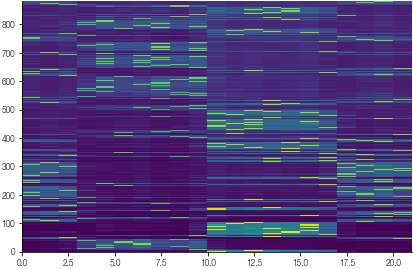

In [9]:
plt.pcolor(sr_reps_part2)

## Predict representational similarity between trials

//anaconda3/envs/tesser/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


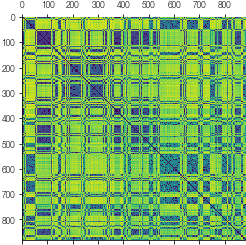

In [10]:
from scipy.spatial import distance
sr_rdm = distance.squareform(distance.pdist(sr_reps_part2, 'correlation'))
plt.matshow(sr_rdm);

## Load neural data

In [11]:
from tesser import rsa
import importlib
importlib.reload(rsa)
patterns = rsa.load_betas(data_dir, 101, 'b_hip_ant')

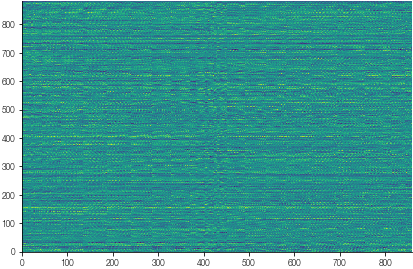

In [12]:
plt.pcolor(patterns)

In [13]:
print(sr_reps_part2.shape)
print(patterns.shape)

(882, 21)
(882, 859)


In [14]:
neural_rdm = distance.squareform(distance.pdist(patterns, 'correlation'))

## Compare model and neural RDMs

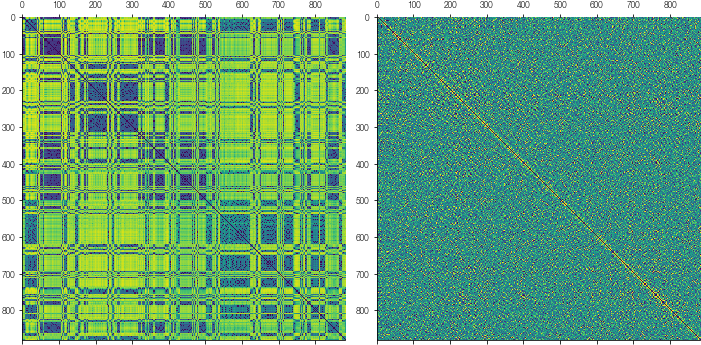

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(sr_rdm)
vmin, vmax = np.percentile(distance.squareform(neural_rdm), [1, 99])
ax[1].matshow(neural_rdm, vmin=vmin, vmax=vmax)

Zooming in on 100 trials:

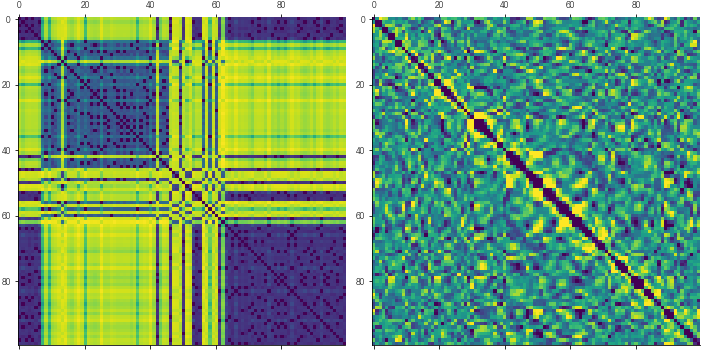

In [24]:
sr_rdm_sym = util.make_sym_matrix(sr_rdm)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(sr_rdm_sym[:100, :100])
ax[1].matshow(neural_rdm[:100, :100], vmin=vmin, vmax=vmax)

In [21]:
from scipy import stats
stats.spearmanr(distance.squareform(sr_rdm_sym), 
                distance.squareform(neural_rdm))

SpearmanrResult(correlation=-0.005104124566991057, pvalue=0.0014652186876972114)